In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [2]:
X = pd.read_csv('transactions_n100000.csv')
X.head()

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234


In [3]:
X = X.drop(['lat','long'], axis=1)

In [4]:
X.head()

,ticket_id,order_timestamp,location,item_name,item_count
0,0x872a40,2019-02-28 18:33:00,4,shake,2
1,0x872a40,2019-02-28 18:33:00,4,burger,2
2,0x872a40,2019-02-28 18:33:00,4,fries,2
3,0x598eb3,2019-09-18 11:59:00,5,burger,1
4,0x598eb3,2019-09-18 11:59:00,5,salad,2


In [5]:
X['main'] = X['item_name'].apply(lambda x: int(x =='burger'or x =='salad'))
X['main_count'] = X['main']*X['item_count']
result = X.groupby(['ticket_id']).sum()[['main_count']]
result.columns = ['party_size']
X = X.merge(result.reset_index(), on='ticket_id', how='left')

In [6]:
mth_day_lst = []
hrs_lst = []
for i in range(X.shape[0]):
    mth_day_lst.append(X['order_timestamp'][i].split()[0].split('-')[1:][0] + '-' + X['order_timestamp'][i].split()[0].split('-')[1:][1])   
    hrs_lst.append(X['order_timestamp'][i].split()[1])

In [7]:
mth_day = pd.DataFrame(mth_day_lst)
hrs = pd.DataFrame(hrs_lst)

In [8]:
X['mth_day'] = mth_day
X['hrs'] = hrs

In [9]:
X = X.drop(['order_timestamp','main','main_count'], axis=1)

In [10]:
# X['item_name'].value_counts()

In [11]:
# Pivot Table
df_count = pd.pivot_table(data = X,index ='ticket_id',columns = 'item_name',values = 'item_count',aggfunc='sum')
df_count.fillna(value = 0,inplace = True)
df_count = df_count.reset_index()
df_hour = X[['ticket_id','hrs']]
df_new = pd.merge(df_count,df_hour,on='ticket_id',how = 'left')
df_new = df_new.drop_duplicates()
df_new.head()

,ticket_id,burger,fries,salad,shake,hrs
0,0x100048,0.0,3.0,3.0,0.0,12:24:00
2,0x100057,1.0,1.0,0.0,0.0,00:24:00
4,0x1000ba,1.0,2.0,1.0,1.0,12:02:00
8,0x1000fb,4.0,5.0,1.0,4.0,19:28:00
12,0x10016e,3.0,3.0,0.0,3.0,17:07:00


In [12]:
df_new = df_new.reset_index()

In [13]:
# Time dummies prep
tm_cat_lst = []
for i in range(df_new.shape[0]):
    if df_new['hrs'][i] < '01:00:00' and df_new['hrs'][i] >= '00:00:00':
        tm_cat_lst.append('0-1')
    elif df_new['hrs'][i] < '02:00:00' and df_new['hrs'][i] >= '01:00:00':
        tm_cat_lst.append('1-2')
    elif df_new['hrs'][i] < '03:00:00' and df_new['hrs'][i] >= '02:00:00':
        tm_cat_lst.append('2-3')
    elif df_new['hrs'][i] < '04:00:00' and df_new['hrs'][i] >= '03:00:00':
        tm_cat_lst.append('3-4')
    elif df_new['hrs'][i] < '05:00:00' and df_new['hrs'][i] >= '04:00:00':
        tm_cat_lst.append('4-5')
    elif df_new['hrs'][i] < '06:00:00' and df_new['hrs'][i] >= '05:00:00':
        tm_cat_lst.append('5-6')
    elif df_new['hrs'][i] < '07:00:00' and df_new['hrs'][i] >= '06:00:00':
        tm_cat_lst.append('6-7')
    elif df_new['hrs'][i] < '08:00:00' and df_new['hrs'][i] >= '07:00:00':
        tm_cat_lst.append('7-8')
    elif df_new['hrs'][i] < '09:00:00' and df_new['hrs'][i] >= '08:00:00':
        tm_cat_lst.append('8-9')
    elif df_new['hrs'][i] < '10:00:00' and df_new['hrs'][i] >= '09:00:00':
        tm_cat_lst.append('9-10')
    elif df_new['hrs'][i] < '11:00:00' and df_new['hrs'][i] >= '10:00:00':
        tm_cat_lst.append('10-11')
    elif df_new['hrs'][i] < '12:00:00' and df_new['hrs'][i] >= '11:00:00':
        tm_cat_lst.append('11-12')
    elif df_new['hrs'][i] < '13:00:00' and df_new['hrs'][i] >= '12:00:00':
        tm_cat_lst.append('12-13')
    elif df_new['hrs'][i] < '14:00:00' and df_new['hrs'][i] >= '13:00:00':
        tm_cat_lst.append('13-14')
    elif df_new['hrs'][i] < '15:00:00' and df_new['hrs'][i] >= '14:00:00':
        tm_cat_lst.append('14-15')
    elif df_new['hrs'][i] < '16:00:00' and df_new['hrs'][i] >= '15:00:00':
        tm_cat_lst.append('15-16')
    elif df_new['hrs'][i] < '17:00:00' and df_new['hrs'][i] >= '16:00:00':
        tm_cat_lst.append('16-17')
    elif df_new['hrs'][i] < '18:00:00' and df_new['hrs'][i] >= '17:00:00':
        tm_cat_lst.append('17-18')
    elif df_new['hrs'][i] < '19:00:00' and df_new['hrs'][i] >= '18:00:00':
        tm_cat_lst.append('18-19')
    elif df_new['hrs'][i] < '20:00:00' and df_new['hrs'][i] >= '19:00:00':
        tm_cat_lst.append('19-20')
    elif df_new['hrs'][i] < '21:00:00' and df_new['hrs'][i] >= '20:00:00':
        tm_cat_lst.append('20-21')
    elif df_new['hrs'][i] < '22:00:00' and df_new['hrs'][i] >= '21:00:00':
        tm_cat_lst.append('22-21')
    elif df_new['hrs'][i] < '23:00:00' and df_new['hrs'][i] >= '22:00:00':
        tm_cat_lst.append('22-23')
    elif df_new['hrs'][i] < '24:00:00' and df_new['hrs'][i] >= '23:00:00':
        tm_cat_lst.append('23-24')

In [14]:
df_new['tm_cat'] = pd.DataFrame(tm_cat_lst)

In [15]:
df_new2 = df_new.drop(['hrs','index'], axis=1)

In [16]:
df_new2.head()

,ticket_id,burger,fries,salad,shake,tm_cat
0,0x100048,0.0,3.0,3.0,0.0,12-13
1,0x100057,1.0,1.0,0.0,0.0,0-1
2,0x1000ba,1.0,2.0,1.0,1.0,12-13
3,0x1000fb,4.0,5.0,1.0,4.0,19-20
4,0x10016e,3.0,3.0,0.0,3.0,17-18


In [17]:
df_new3 = df_new2

In [18]:
df_new3 = df_new3.drop(['ticket_id'], axis=1)
df_new3['location'] = X.location
df_new3.head()

,burger,fries,salad,shake,tm_cat,location
0,0.0,3.0,3.0,0.0,12-13,4
1,1.0,1.0,0.0,0.0,0-1,4
2,1.0,2.0,1.0,1.0,12-13,4
3,4.0,5.0,1.0,4.0,19-20,5
4,3.0,3.0,0.0,3.0,17-18,5


In [19]:
# Get dummies
df_new3 = pd.concat([df_new3.drop('location', axis=1), pd.get_dummies(df_new3['location']).rename(columns=lambda x: 'loc_' + str(x))], axis=1)
df_new3 = pd.concat([df_new3.drop('tm_cat', axis=1), pd.get_dummies(df_new3['tm_cat'])], axis=1)


In [20]:
df_new3.head()

,burger,fries,salad,shake,loc_1,loc_2,loc_3,loc_4,loc_5,loc_6,...,14-15,15-16,16-17,17-18,18-19,19-20,20-21,22-21,22-23,23-24
0,0.0,3.0,3.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,2.0,1.0,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,5.0,1.0,4.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,3.0,3.0,0.0,3.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
#enc = OneHotEncoder()
#enc.fit(X)
#X_out = enc.transform(X)

In [22]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_new3)
    distortions.append(kmeanModel.inertia_)

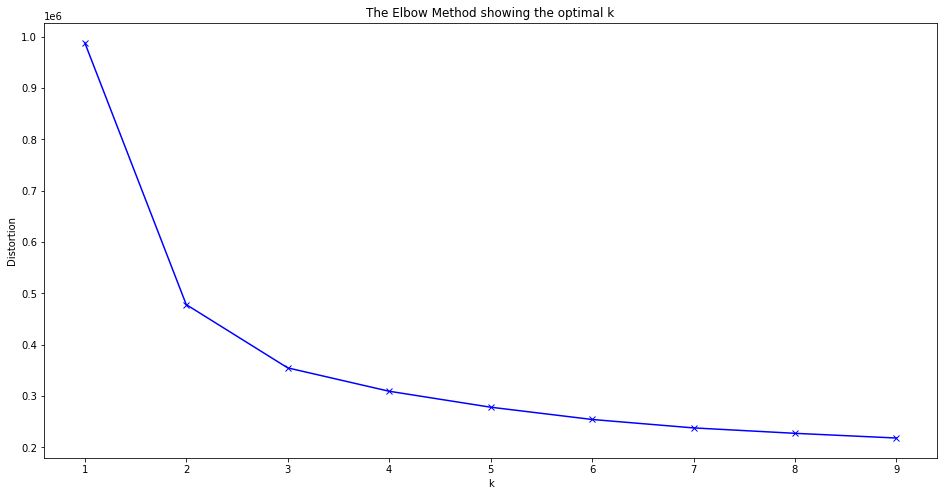

In [23]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [24]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_new3)

KMeans(n_clusters=3)

In [25]:
y_km = kmeanModel.fit_predict(df_new3)

In [26]:
#km = KMeans(
#    n_clusters=3, init='random',
#    n_init=10, max_iter=300, 
#    tol=1e-04, random_state=0
#)
#y_km = km.fit_predict(X_out)

In [27]:
clus = pd.DataFrame(y_km)

In [28]:
clus.head()

,0
0,0
1,1
2,1
3,2
4,2


In [29]:
df_new3['cluster'] = clus[0]

In [30]:
clus1 = df_new3[df_new3['cluster']==0]
clus2 = df_new3[df_new3['cluster']==1]
clus3 = df_new3[df_new3['cluster']==2]

In [31]:
df_new3.head()

,burger,fries,salad,shake,loc_1,loc_2,loc_3,loc_4,loc_5,loc_6,...,15-16,16-17,17-18,18-19,19-20,20-21,22-21,22-23,23-24,cluster
0,0.0,3.0,3.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,2.0,1.0,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.0,5.0,1.0,4.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2
4,3.0,3.0,0.0,3.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,2


In [32]:
df_new3['ticket_id'] = df_new2['ticket_id']
df_new3.head()

,burger,fries,salad,shake,loc_1,loc_2,loc_3,loc_4,loc_5,loc_6,...,16-17,17-18,18-19,19-20,20-21,22-21,22-23,23-24,cluster,ticket_id
0,0.0,3.0,3.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0x100048
1,1.0,1.0,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0x100057
2,1.0,2.0,1.0,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0x1000ba
3,4.0,5.0,1.0,4.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,2,0x1000fb
4,3.0,3.0,0.0,3.0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,2,0x10016e


In [33]:
df_new3.to_csv("mkt2_updated.csv",index=False)